In [ ]:
# pip install webcolors

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
from webcolors import rgb_to_name

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (650, 1000, 3)


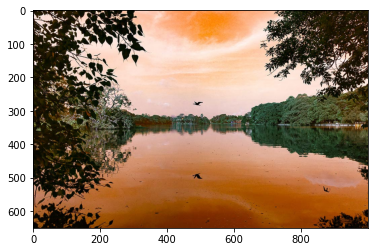

In [ ]:
image = cv2.imread('/content/Rabindra-Sarobar.jpg')
print("Type: {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)
pass

#The type of the input image is numpy.ndarray with the shape (650,1000)

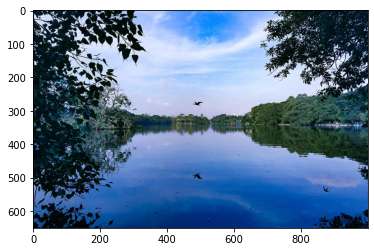

In [ ]:
#cv2.imread reads an image in BGR format converting to RGB 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
pass

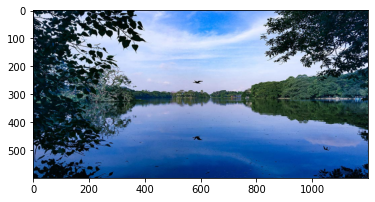

In [ ]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [ ]:
# Converting RGB decimal color into hex code for better representation
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [ ]:
# Helper function for loading images from directory
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [ ]:
modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)


In [ ]:
#Finding 15 centroids in the 3d spcae of rgb data points or every pixel of the image.
number_of_colors = 15
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)

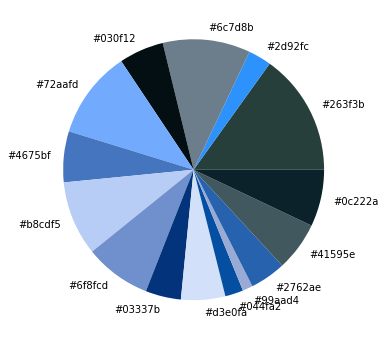

In [ ]:
counts = Counter(labels)
center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
# color_names = []
# for i in ordered_colors:
#   i = [round(x) for x in i]
#   color_names.append(rgb_to_name(i))
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]
show_chart = True
if (show_chart):
    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels =hex_colors, colors = hex_colors)

